# All players dataframes

En este script nos dedicaremos a crear una base de datos limpia segmentada por hitters y fielders. Se divide en las siguientes secciones:

- **Visualización del contenido de las bases de datos.**
- **Limpieza de la base de datos y exportación.**
- **Construcción de variables para estimaciones.**
- **Unión de las bases de datos para nuevas bases transversales.**
- **Segmentación de bases datos de acuerdo a la agencia libre.**
- **Realización del panel data de acuerdo a las especificaciones.**
- **Generación de las variables para el modelo dinámico.**

Importemos los modulos necesarios así como especificar la configuración deseada.

In [61]:
import pandas as pd
import numpy as np
import math
import os
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from termcolor import colored

print('Modulos importados')

Modulos importados


In [3]:
# Configuraciones
warnings.filterwarnings('ignore')

In [4]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/ETL_Scripts/Hand_Made_Scripts/Panel_merge


In [5]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Importación de las bases de datos

Importemos los páneles de ambas tipos de bases de datos: Anuales y acumuladas. Las bases de datos por juego no cuentan con más de 10 observaciones, razón por la que no se usarán

In [6]:
# Paths
cum_path = 'ETL_Data/Panel/Cumulative/Dynamic_model/'
ya_path = 'ETL_Data/Panel/Yearly_average/Dynamic_model/'
csv = '.csv'

# Cumulative:
hitter_cum = pd.read_csv(cum_path + 'panel_hitters_cum_t_1' + csv)
fielder_cum = pd.read_csv(cum_path + 'panel_fielders_cum_t_1' + csv)

# YA:
hitter_ya = pd.read_csv(ya_path + 'panel_hitters_ya_t_1' + csv)
fielder_ya = pd.read_csv(ya_path + 'panel_fielders_ya_t_1' + csv)

Veamos las dimensaiones de los páneles

In [7]:
# Dimentions
print("Acumulada \nBateadores:")
print(hitter_cum.shape)
print("Fildeadores:")
print(fielder_cum.shape)

Acumulada 
Bateadores:
(196, 176)
Fildeadores:
(219, 184)


In [8]:
# Dimentions
print("Promedio anual \nBateadores:")
print(hitter_ya.shape)
print("Fildeadores:")
print(fielder_ya.shape)

Promedio anual 
Bateadores:
(196, 176)
Fildeadores:
(219, 184)


Se aprecia que son de las mismas dimensiones. Lo que haremos ahora es crear una lista de las variables a las que le agregaremos un sufijo que indique de qué panel parten

In [9]:
hitter_varlist = [
                'At-bats_2_t',
                'At-bats_t',
                'At_bats_2_t',
                'At_bats_t',
                'Bateos_2_t',
                'Bateos_promedio_2_t',
                'Bateos_promedio_t',
                'Bateos_t',
                'Dobles_2_t',
                'Dobles_t',
                'Home-runs_t',
                'Home_runs_2_t',
                'Home_runs_t',
                'Juegos totales_t',
                'Juegos_iniciados_2_t',
                'Juegos_iniciados_t',
                'Juegos_t',
                'Juegos_totales_t',
                'Porcentaje_On-base-plus-slugging_2_t',
                'Porcentaje_On-base-plus-slugging_t',
                'Porcentaje_On_base_plus_slugging_2_t',
                'Porcentaje_On_base_plus_slugging_t',
                'Porcentaje_juegos_iniciados_2_t',
                'Porcentaje_juegos_iniciados_t',
                'Porcentaje_juegos_t',
                'Porcentaje_on-base_2_t',
                'Porcentaje_on-base_t',
                'Porcentaje_on_base_2_t',
                'Porcentaje_on_base_t',
                'Porcentaje_slugging_2_t',
                'Porcentaje_slugging_t',
                'Runs-batted-in_2_t',
                'Runs-batted-in_t',
                'Runs_batted_in_2_t',
                'Runs_batted_in_t',
                'Triples_2_t',
                'Triples_t',
                'WAR_2_t',
                'WAR_t',
                'X_At_bats_2_t_1',
                'X_At_bats_t_1',
                'X_Bateos_2_t_1',
                'X_Bateos_promedio_2_t_1',
                'X_Bateos_promedio_t_1',
                'X_Bateos_t_1''',
                'X_Dobles_2_t_1',
                'X_Dobles_t_1',
                'X_Home_runs_2_t_1',
                'X_Home_runs_t_1',
                'X_Juegos_iniciados_2_t_1',
                'X_Juegos_iniciados_t_1',
                'X_Porcentaje_On_base_plus_slugging_2_t_1',
                'X_Porcentaje_On_base_plus_slugging_t_1',
                'X_Porcentaje_on_base_2_t_1',
                'X_Porcentaje_on_base_t_1',
                'X_Porcentaje_slugging_2_t_1',
                'X_Porcentaje_slugging_t_1',
                'X_Runs_batted_in_2_t_1',
                'X_Runs_batted_in_t_1',
                'X_Triples_2_t_1',
                'X_Triples_t_1',
                'X_WAR_2_t_1',
                'X_WAR_t_1'
                ]

In [10]:
fielder_varlist = [
                    'Bateos_2_t',
                    'Bateos_t',
                    'Carreras_2_t',
                    'Carreras_ganadas_2_t',
                    'Carreras_ganadas_t',
                    'Carreras_t',
                    'Comando_2_t',
                    'Comando_t',
                    'Control_2_t',
                    'Control_t',
                    'Control_t_1',
                    'Dominio_2_t',
                    'Dominio_t',
                    'ERA_2_t',
                    'ERA_t',
                    'Inning_pitched_2_t',
                    'Inning_pitched_t',
                    'Juegos_totales_t',
                    'Juegos_iniciados_t',
                    'Juegos_t',
                    'Losses_2_t',
                    'Losses_t',
                    'Porcentaje_juegos_t',
                    'Promedio_victorias_t',
                    'Saves_2_t',
                    'Saves_t',
                    'Strike-outs_2_t',
                    'Strike-outs_t',
                    'Strike_outs_2_t',
                    'Strike_outs_t',
                    'WAR_2_t',
                    'WAR_t',
                    'WHIP_2_t',
                    'WHIP_t',
                    'Walks_2_t',
                    'Walks_t',
                    'Wins_2_t',
                    'Wins_t',
                    'X_Bateos_2_t_1',
                    'X_Bateos_t_1',
                    'X_Carreras_2_t_1',
                    'X_Carreras_ganadas_2_t_1',
                    'X_Carreras_ganadas_t_1',
                    'X_Carreras_t_1',
                    'X_Comando_2_t_1',
                    'X_Comando_t_1',
                    'X_Control_2_t_1',
                    'X_Control_t_1',
                    'X_Dominio_2_t_1',
                    'X_Dominio_t_1',
                    'X_ERA_2_t_1',
                    'X_ERA_t_1',
                    'X_Inning_pitched_2_t_1',
                    'X_Inning_pitched_t_1',
                    'X_Losses_2_t_1',
                    'X_Losses_t_1',
                    'X_Saves_2_t_1',
                    'X_Saves_t_1',
                    'X_Strike_outs_2_t_1',
                    'X_Strike_outs_t_1',
                    'X_WAR_2_t_1',
                    'X_WAR_t_1',
                    'X_WHIP_2_t_1',
                    'X_WHIP_t_1',
                    'X_Walks_2_t_1',
                    'X_Walks_t_1',
                    'X_Wins_2_t_1',
                    'X_Wins_t_1'
                    ]

### Estrategia

Para determinar qué columnas son distintas entre las bases de datos tomaremos la diferencia de cada una de las estadísticas con el mismo nombre en ambos ṕáneles y donde la suma de todos los valores de la columna sean distintos de cero, significará que no son iguales dichas columnas.

In [11]:
hitter_to_add = []

for stat in range(0,len(hitter_varlist)):
    
    # Diferencia de valores:
    hitter_diff = (hitter_cum[hitter_varlist[stat]] - hitter_ya[hitter_varlist[stat]]).tolist()
    
    # Suma de los elementos:
    hitter_sum = sum(hitter_diff)
    
    if hitter_sum != 0:
        print(hitter_varlist[stat])
        
        # Añadamos la estadística a un lista
        hitter_to_add.append(hitter_varlist[stat])

WAR_2_t
WAR_t
X_At_bats_t_1
X_Bateos_2_t_1
X_Bateos_promedio_t_1
X_Bateos_t_1
X_Dobles_2_t_1
X_Dobles_t_1
X_Home_runs_2_t_1
X_Home_runs_t_1
X_Juegos_iniciados_2_t_1
X_Juegos_iniciados_t_1
X_Porcentaje_On_base_plus_slugging_2_t_1
X_Porcentaje_On_base_plus_slugging_t_1
X_Porcentaje_on_base_2_t_1
X_Porcentaje_on_base_t_1
X_Porcentaje_slugging_2_t_1
X_Runs_batted_in_2_t_1
X_Triples_2_t_1
X_WAR_2_t_1
X_WAR_t_1


In [12]:
fielder_to_add = []

for stat in range(0,len(fielder_varlist)):
    # Diferencia de valores:
    fielder_diff = (fielder_cum[fielder_varlist[stat]] - fielder_ya[fielder_varlist[stat]]).tolist()
    
    # Suma de los elementos:
    fielder_sum = sum(fielder_diff)
    
    if fielder_sum != 0:
        print(fielder_varlist[stat])
        
        # Añadamos la estadística a un lista
        fielder_to_add.append(fielder_varlist[stat])

Control_t_1
WAR_2_t
WAR_t
X_Bateos_2_t_1
X_Bateos_t_1
X_Carreras_2_t_1
X_Carreras_ganadas_2_t_1
X_Carreras_ganadas_t_1
X_Carreras_t_1
X_Comando_2_t_1
X_Comando_t_1
X_Control_2_t_1
X_Control_t_1
X_Dominio_2_t_1
X_Dominio_t_1
X_ERA_2_t_1
X_ERA_t_1
X_Inning_pitched_2_t_1
X_Inning_pitched_t_1
X_Losses_2_t_1
X_Losses_t_1
X_Saves_2_t_1
X_Saves_t_1
X_Strike_outs_2_t_1
X_Strike_outs_t_1
X_WAR_2_t_1
X_WAR_t_1
X_WHIP_2_t_1
X_WHIP_t_1
X_Walks_2_t_1
X_Walks_t_1
X_Wins_2_t_1
X_Wins_t_1


Puesto que sí hay columnas distintas entre las bases de datos, añadiremos un sufijo que denote el panel de procedencia de estas estadísticas para luego añadirlas al otro panel.

In [13]:
# Bateadores:
# Dictionary comprehension to create mapping from old column names to new column names
cum_mapping = {col: col + '_cum' if col in hitter_varlist else col for col in hitter_cum.columns}
# Rename columns using the mapping
hitter_cum = hitter_cum.rename(columns = cum_mapping)

# Fildeadores:
# Dictionary comprehension to create mapping from old column names to new column names
cum_mapping = {col: col + '_cum' if col in fielder_varlist else col for col in fielder_cum.columns}
# Rename columns using the mapping
fielder_cum = fielder_cum.rename(columns = cum_mapping)

In [14]:
# Bateadores:
# Dictionary comprehension to create mapping from old column names to new column names
ya_mapping = {col: col + '_ya' if col in hitter_varlist else col for col in hitter_ya.columns}
# Rename columns using the mapping
hitter_ya = hitter_ya.rename(columns = ya_mapping)

# Fildeadores:
# Dictionary comprehension to create mapping from old column names to new column names
ya_mapping = {col: col + '_ya' if col in fielder_varlist else col for col in fielder_ya.columns}
# Rename columns using the mapping
fielder_ya = fielder_ya.rename(columns = ya_mapping)

Añadamos las columnas distintas del panel de promedios anuales al acumlativo.

In [15]:
# filter columns with '_ya' suffix
# Bateadores:
filtered_hitter_ya = hitter_ya.filter(like = '_ya')
filtered_hitter_ya['Jugador'] = hitter_ya['Jugador']
# Fildeadores:
filtered_fielder_ya = fielder_ya.filter(like = '_ya')
filtered_fielder_ya['Jugador'] = fielder_ya['Jugador']

Realicemos el merge de las bases de datos en lugar de concatenar debido a que no sabemos si tienen los mismos juadores. Este será nuestro panel final para el modelo dinámico

In [16]:
hitter_dynamic_panel = pd.merge(hitter_cum, filtered_hitter_ya,
                                on = ['Jugador'])
fielder_dynamic_panel = pd.merge(fielder_cum, filtered_fielder_ya,
                                on = ['Jugador'])

Veamos las dimensiones

In [17]:
print("Bateadores:")
print(hitter_dynamic_panel.shape)
print("Fildeadores:")
print(fielder_dynamic_panel.shape)

Bateadores:
(1246, 239)
Fildeadores:
(1943, 252)


El total de nan-values

In [18]:
# Get the total number of NaN values in the dataframe
print("Bateadores:")
print(hitter_dynamic_panel.isna().sum().sum())
print("Fildeadores:")
print(fielder_dynamic_panel.isna().sum().sum())

Bateadores:
0
Fildeadores:
0


Esto nos dice que en ambos tipos de panel (ya y cum) tenían los mismos jugadores

In [19]:
path = 'ETL_Data/Panel/General/Dynamic_model/'
hitter_dynamic_panel.to_csv(path + 'dynamic_model_hitter' + '.csv',
                            index = False)
fielder_dynamic_panel.to_csv(path + 'dynamic_model_fielder' + '.csv',
                             index = False)

## PCA

Ahora, filtraremos aquellas columnas que inicien con el prefijo **X** y luego de acuerdo al periodo al que pertenecen con el propósito de hacer un análisis de componentes principales.

In [55]:
# Bateadores
# t-1:
hitter_dynamic_panel_t_1_aux = hitter_dynamic_panel.filter(regex = '^X_|^Y_|^Jugador')
x_cols = hitter_dynamic_panel_t_1_aux.filter(like = 'X_').columns
hitter_dynamic_panel_t_1 = hitter_dynamic_panel_t_1_aux
hitter_dynamic_panel_t_1[x_cols] = hitter_dynamic_panel_t_1.filter(like = '_t_1')

# t:
names_t = [name.lstrip('X_') for name in hitter_dynamic_panel_t_1_aux.columns]
names_t = [name.replace('t_1', 't') for name in names_t]
hitter_dynamic_panel_t = hitter_dynamic_panel.loc[:, names_t]

In [56]:
# Bateadores
# t-1:
fielder_dynamic_panel_t_1_aux = fielder_dynamic_panel.filter(regex = '^X_|^Y_|^Jugador')
x_cols = fielder_dynamic_panel_t_1_aux.filter(like = 'X_').columns
fielder_dynamic_panel_t_1 = fielder_dynamic_panel_t_1_aux
fielder_dynamic_panel_t_1[x_cols] = fielder_dynamic_panel_t_1.filter(like = '_t_1')

# t:
names_t = [name.lstrip('X_') for name in fielder_dynamic_panel_t_1_aux.columns]
names_t = [name.replace('t_1', 't') for name in names_t]
fielder_dynamic_panel_t = fielder_dynamic_panel.loc[:, names_t]

Entonces, tenemos que declarar nuestras variables independientes para cada panel

In [91]:
# Bateadores 
X_hitter_t_1 = hitter_dynamic_panel_t_1.filter(like = 'X_')
X_hitter_t = hitter_dynamic_panel_t.filter(regex = '^(?!Jugador|Y_)',
                                           axis=1)
# FIldeadores 
X_fielder_t_1 = fielder_dynamic_panel_t_1.filter(like = 'X_')
X_fielder_t = fielder_dynamic_panel_t.filter(regex = '^(?!Jugador|Y_)',
                                             axis=1)

Luego, apliquemos PCA y hallemos el óptimo de componentes mediante la gráfica de la varianza que explican los componentes

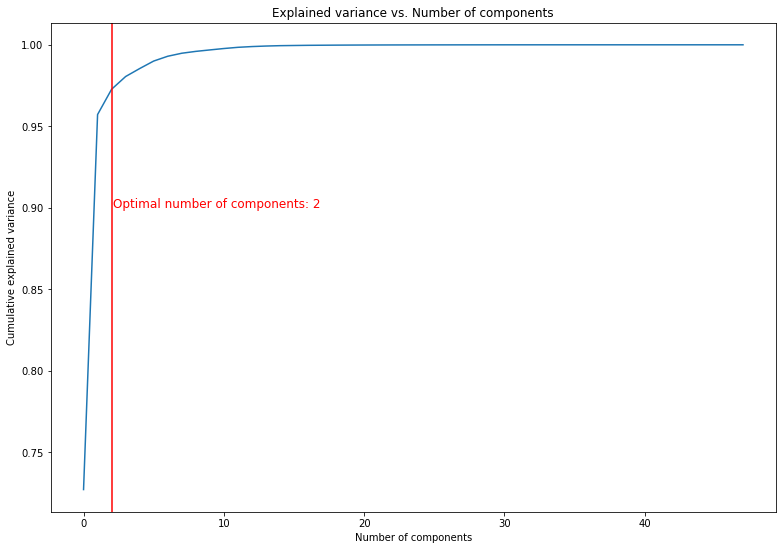

In [81]:
# Initialize PCA object
pca = PCA()

# Fit PCA to data
pca.fit(X_hitter_t_1)

# Plot cumulative explained variance as a function of number of components
plt.subplots(figsize = (13,9))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find number of components that capture 80% of variance
optimal_n_components = np.argmax(cumulative_variance >= 0.8) + 1
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.text(optimal_n_components + 0.1, 0.9,
        f'Optimal number of components: {optimal_n_components}',
        fontsize=12,
        color='red')
plt.title('Explained variance vs. Number of components')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.show()

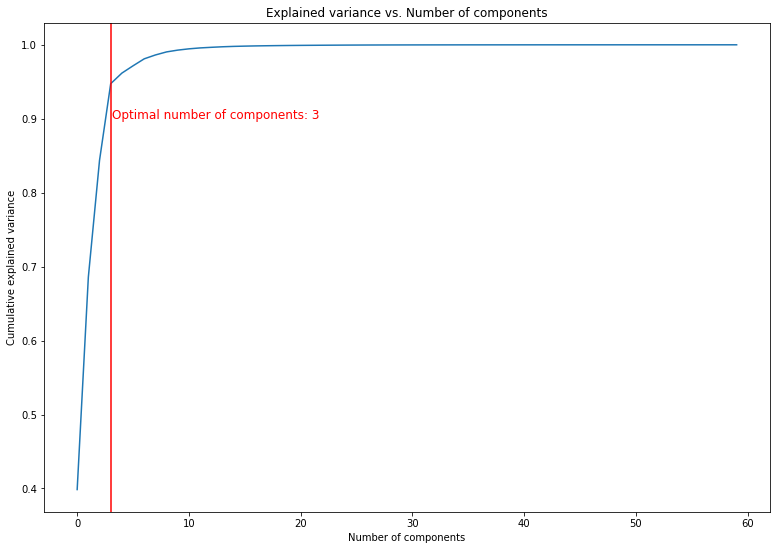

In [82]:
# Initialize PCA object
pca = PCA()

# Fit PCA to data
pca.fit(X_fielder_t_1)

# Plot cumulative explained variance as a function of number of components
plt.subplots(figsize = (13,9))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find number of components that capture 80% of variance
optimal_n_components = np.argmax(cumulative_variance >= 0.8) + 1
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.text(optimal_n_components + 0.1, 0.9,
        f'Optimal number of components: {optimal_n_components}',
        fontsize=12,
        color='red')
plt.title('Explained variance vs. Number of components')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.show()

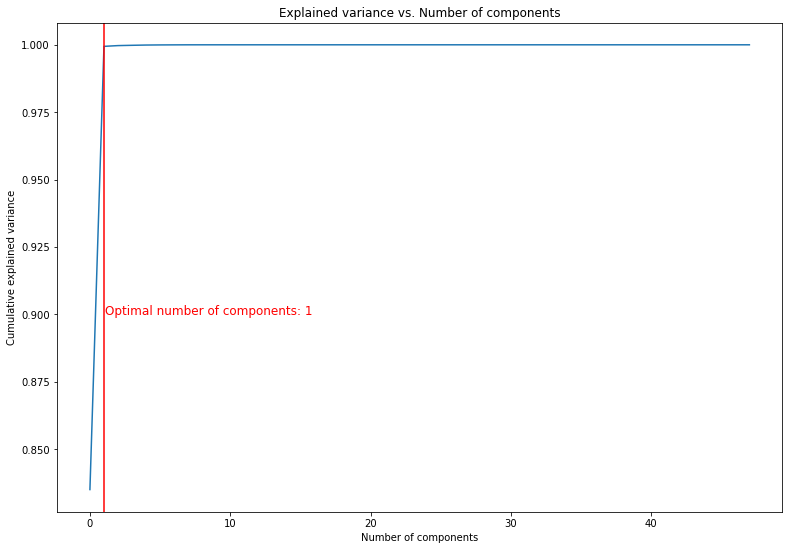

In [92]:
# Initialize PCA object
pca = PCA()

# Fit PCA to data
pca.fit(X_hitter_t)

# Plot cumulative explained variance as a function of number of components
plt.subplots(figsize = (13,9))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find number of components that capture 80% of variance
optimal_n_components = np.argmax(cumulative_variance >= 0.8) + 1
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.text(optimal_n_components + 0.1, 0.9,
        f'Optimal number of components: {optimal_n_components}',
        fontsize=12,
        color='red')
plt.title('Explained variance vs. Number of components')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.show()

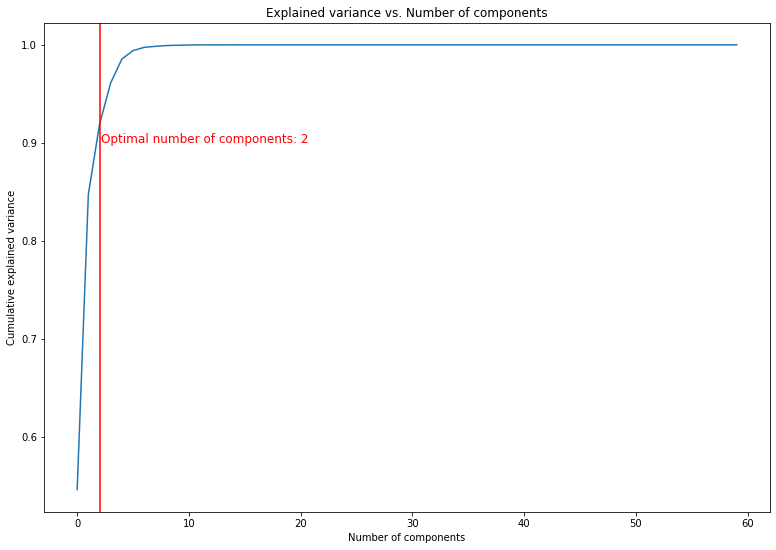

In [93]:
# Initialize PCA object
pca = PCA()

# Fit PCA to data
pca.fit(X_fielder_t)

# Plot cumulative explained variance as a function of number of components
plt.subplots(figsize = (13,9))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find number of components that capture 80% of variance
optimal_n_components = np.argmax(cumulative_variance >= 0.8) + 1
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.text(optimal_n_components + 0.1, 0.9,
        f'Optimal number of components: {optimal_n_components}',
        fontsize=12,
        color='red')
plt.title('Explained variance vs. Number of components')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.show()